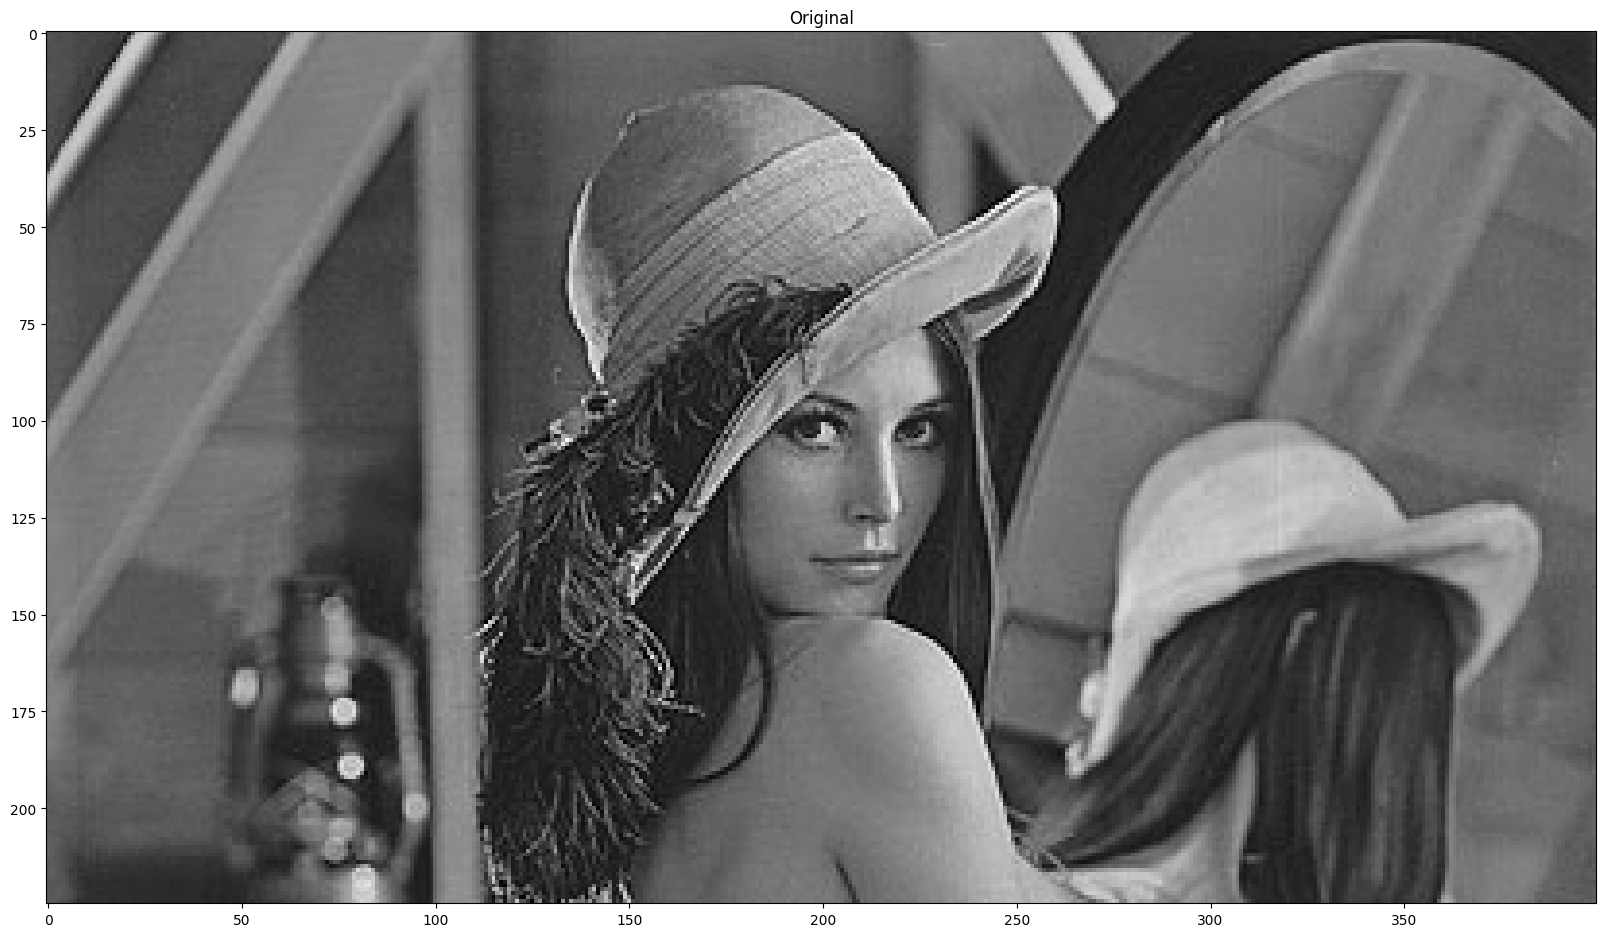

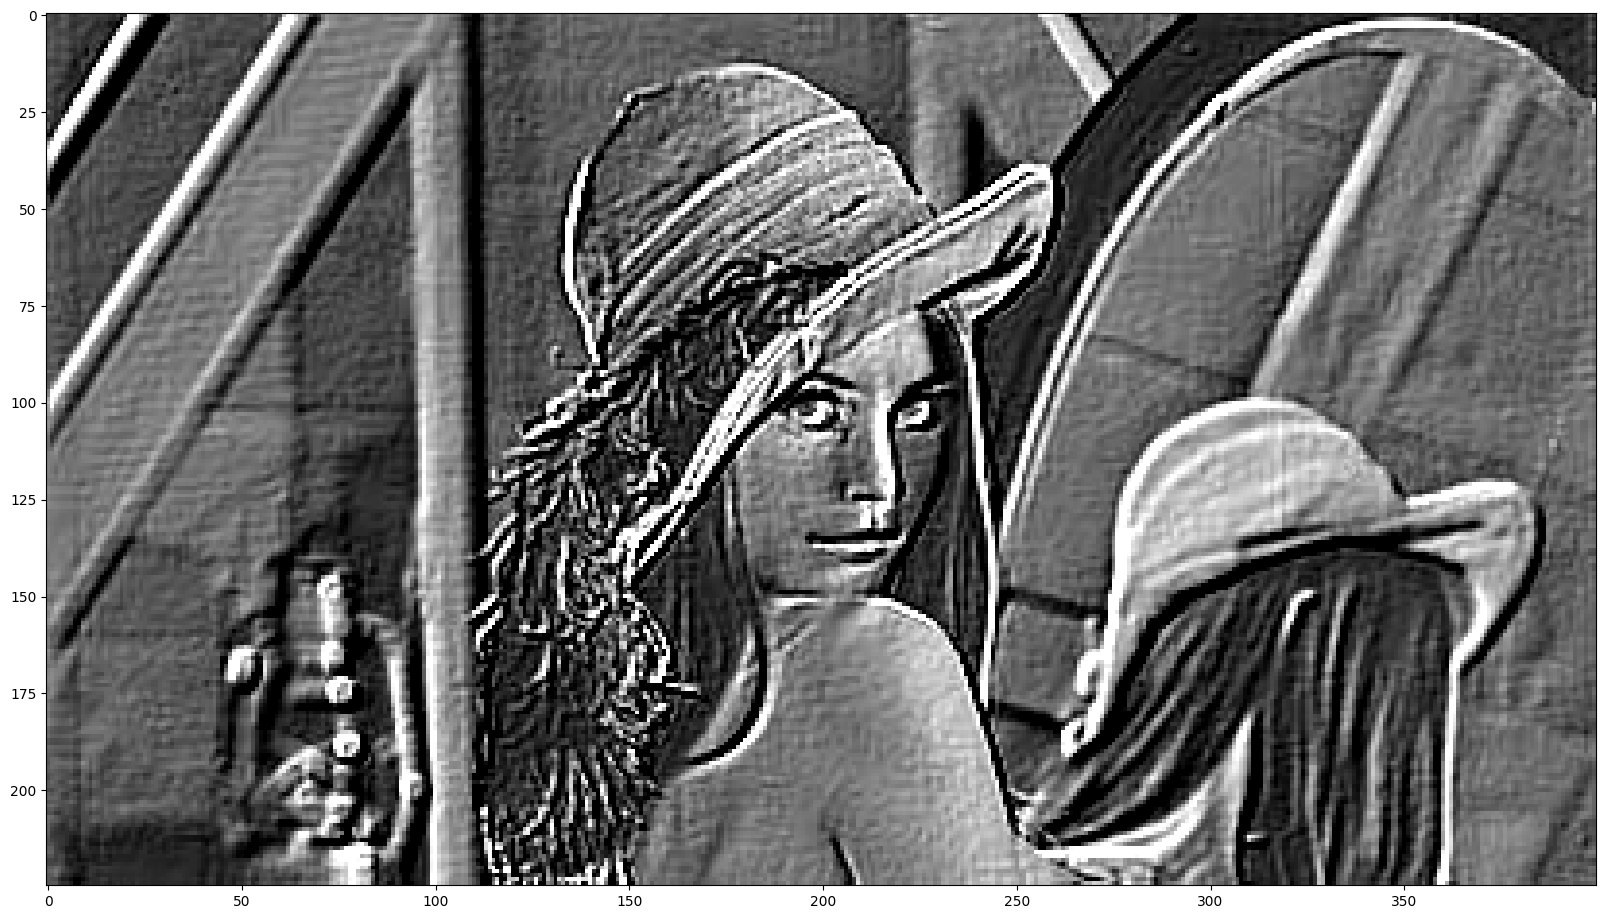

In [ ]:
# Task 1

import cv2
import numpy as np
from matplotlib import pyplot as plt

def emboss(grayImage):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    dst = cv2.filter2D(grayImage,-1,kernel)
    return dst

imgBGR = cv2.imread('../img/lena.jpg')
imgGray = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,20))
plt.imshow(imgGray, cmap="gray")
plt.title('Original')
plt.show()

embossedImg = emboss(imgGray)

plt.figure(figsize=(20,20))
plt.imshow(embossedImg, cmap="gray")
plt.show()


Task 2

Image smoothing is a process which is applied to an image to reduce noise

- Averaging Filter: Replaces the pixel in the middle with the average of the pixels around it (Reduce noise)
- Median Filter: Computes the median value of the pixel values in the kernel and replaces the central pixel with this median value. (Reduce Salt-and-Pepper effects)
- Gaussian Blur: Applies a weighted averaging using a Gaussian function. Pixels closer to the center of the kernel are given more weight, while those further away contribute less. (Natural-looking blurring)

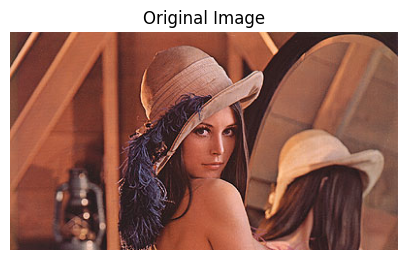

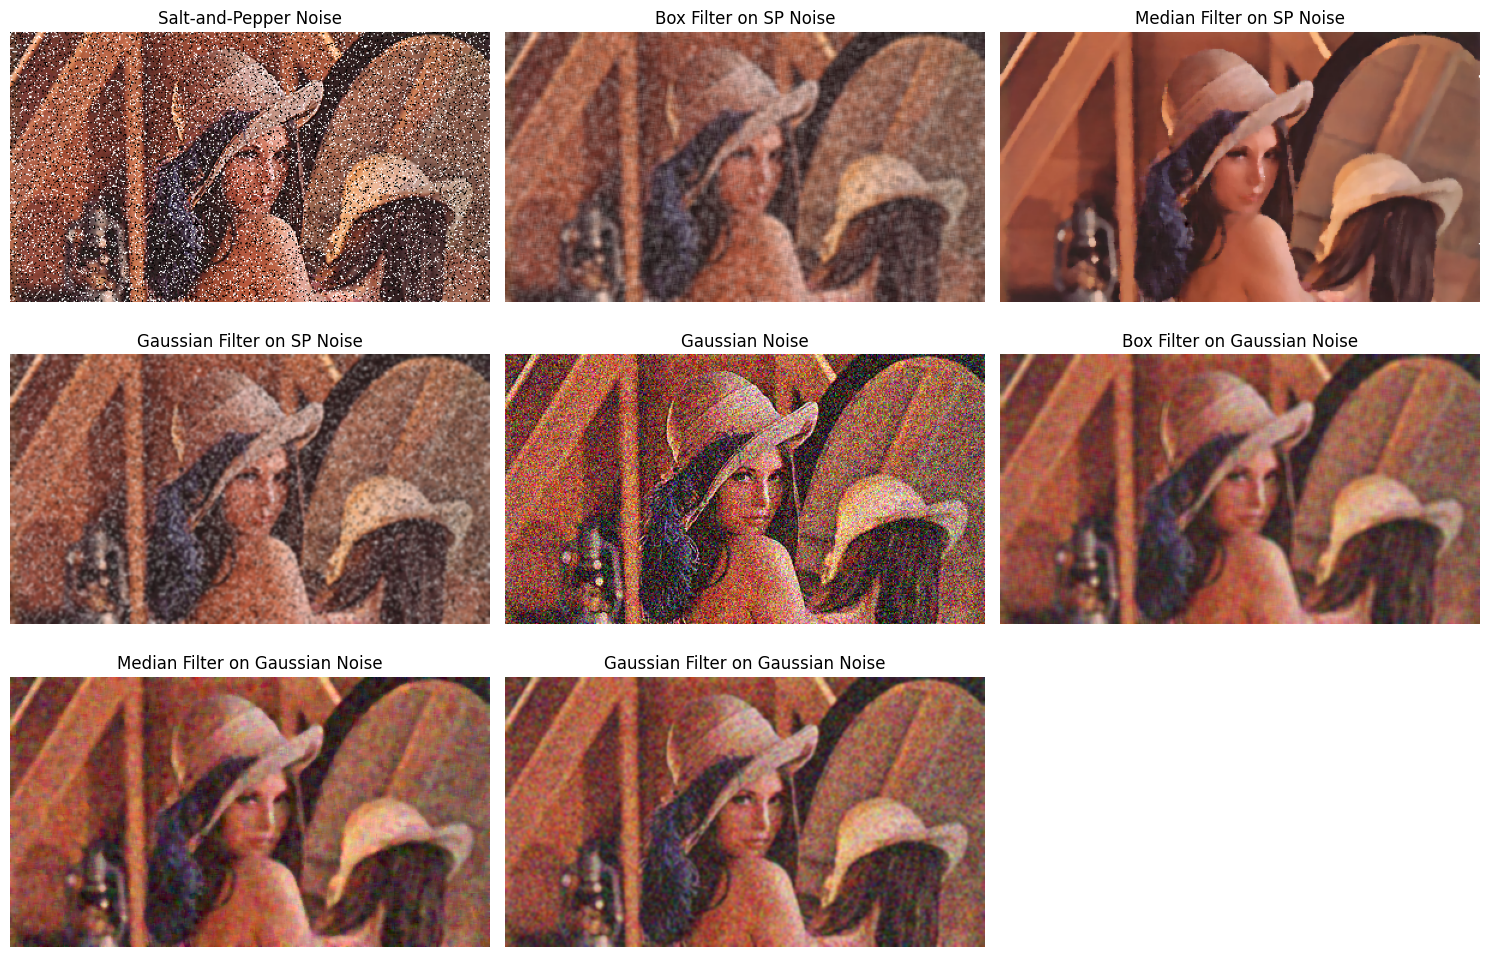

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to add salt-and-pepper noise
def addsalt_pepper(img, SNR):
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255  # Salt noise
    img_[mask == 2] = 0    # Pepper noise
    return img_

# Load image and convert to RGB
image_path = '../img/lena.jpg'
imgBGR = cv2.imread(image_path)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Display Original Image
plt.figure(figsize=(5, 5))
plt.imshow(imgRGB)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Add salt-and-pepper noise
SNR = 0.8  # Signal-to-Noise Ratio
im_sp_noise = addsalt_pepper(imgRGB.transpose(2, 1, 0), SNR).transpose(2, 1, 0)

# Add Gaussian noise
mean = 0
sigma = 50
gaussian_noise = np.random.normal(mean, sigma, imgRGB.shape).astype(np.int16)
im_gaussian_noise = np.clip(imgRGB + gaussian_noise, 0, 255).astype(np.uint8)

# Apply Averaging (Box) Filter
box_filtered_sp = cv2.blur(im_sp_noise, (5, 5))
box_filtered_gaussian = cv2.blur(im_gaussian_noise, (5, 5))

# Apply Median Filter
median_filtered_sp = cv2.medianBlur(im_sp_noise, 5)
median_filtered_gaussian = cv2.medianBlur(im_gaussian_noise, 5)

# Apply Gaussian Filter
gaussian_filtered_sp = cv2.GaussianBlur(im_sp_noise, (5, 5), 0)
gaussian_filtered_gaussian = cv2.GaussianBlur(im_gaussian_noise, (5, 5), 0)

# Plot Results for Salt-and-Pepper Noise
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(im_sp_noise)
plt.title('Salt-and-Pepper Noise')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(box_filtered_sp)
plt.title('Box Filter on SP Noise')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(median_filtered_sp)
plt.title('Median Filter on SP Noise')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(gaussian_filtered_sp)
plt.title('Gaussian Filter on SP Noise')
plt.axis('off')

# Plot Results for Gaussian Noise
plt.subplot(3, 3, 5)
plt.imshow(im_gaussian_noise)
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(box_filtered_gaussian)
plt.title('Box Filter on Gaussian Noise')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(median_filtered_gaussian)
plt.title('Median Filter on Gaussian Noise')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(gaussian_filtered_gaussian)
plt.title('Gaussian Filter on Gaussian Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

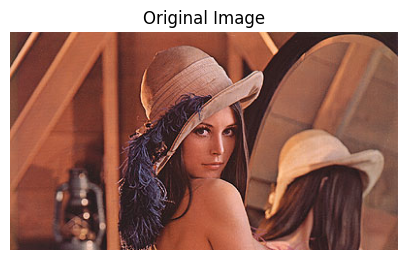

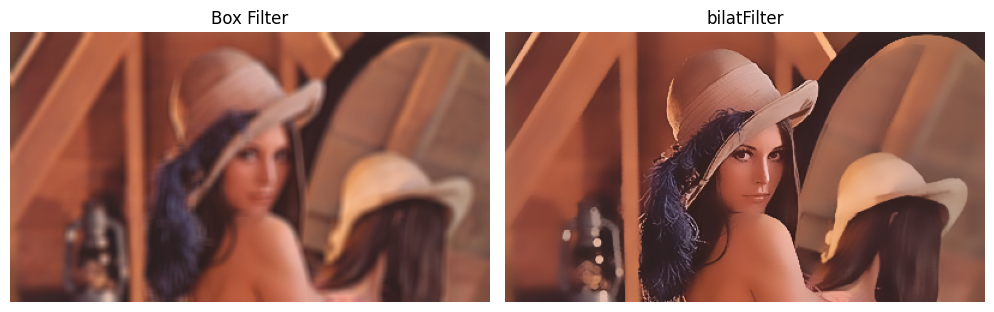

In [ ]:
# Task 2.D

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image and convert to RGB
image_path = '../img/lena.jpg'
imgBGR = cv2.imread(image_path)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Display Original Image
plt.figure(figsize=(5, 5))
plt.imshow(imgRGB)
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 10))

boxFilter = cv2.boxFilter(imgRGB, 0, (7,7))
plt.subplot(3, 3, 1)
plt.imshow(boxFilter)
plt.title('Box Filter')
plt.axis('off')

bilatFilter = cv2.bilateralFilter(imgRGB, 15, 75, 75)
plt.subplot(3, 3, 2)
plt.imshow(bilatFilter)
plt.title('bilatFilter')
plt.axis('off')

# Box filter applies a blur
# bilatFilter makes the image look almost "pasty"

plt.tight_layout()
plt.show()

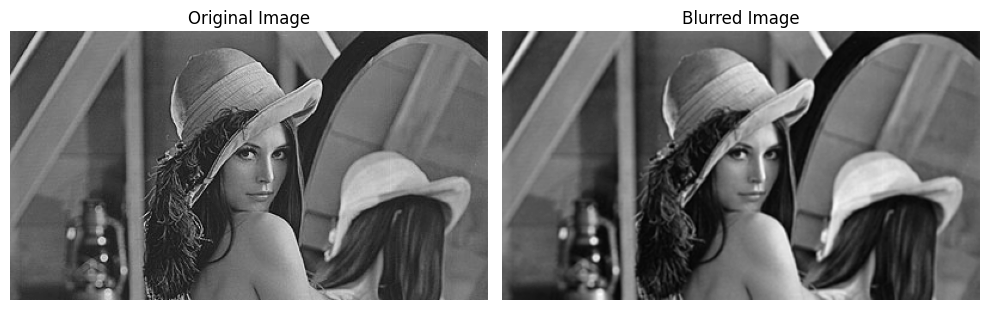

In [2]:
# Task 3

def apply_gaussian_blur(image):
    gaussian_kernel = (1 / 16) * np.array([[1, 2, 1],
                                           [2, 4, 2],
                                           [1, 2, 1]])
    
    blurred_image = cv2.filter2D(image, -1, gaussian_kernel)
    
    return blurred_image

import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = "../img/lena.jpg"
original_image = cv2.imread(image_path)
grayImg = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = apply_gaussian_blur(grayImg)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayImg, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()
